In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('Housing Train.csv')
train.head()
test = pd.read_csv('Housing test.csv')

In [4]:
#Determine missing values
train.isnull().sum() 


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


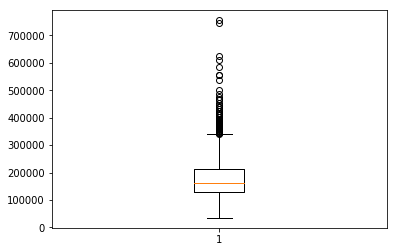

In [6]:
#Look at the distribution of sale price
plt.boxplot(train['SalePrice'])
plt.show()
#shows the presence of a few outliers

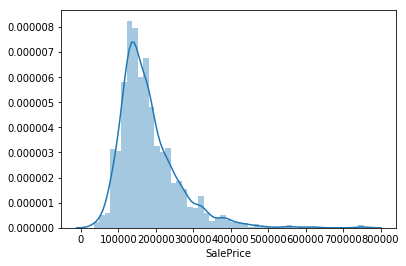

In [7]:
sns.distplot(train['SalePrice'])
plt.show()
#Right skewed. Lets do a logarithm of the sale price at a later point to help make it more normally distributed
#This so because regression performs well on normally distributed data

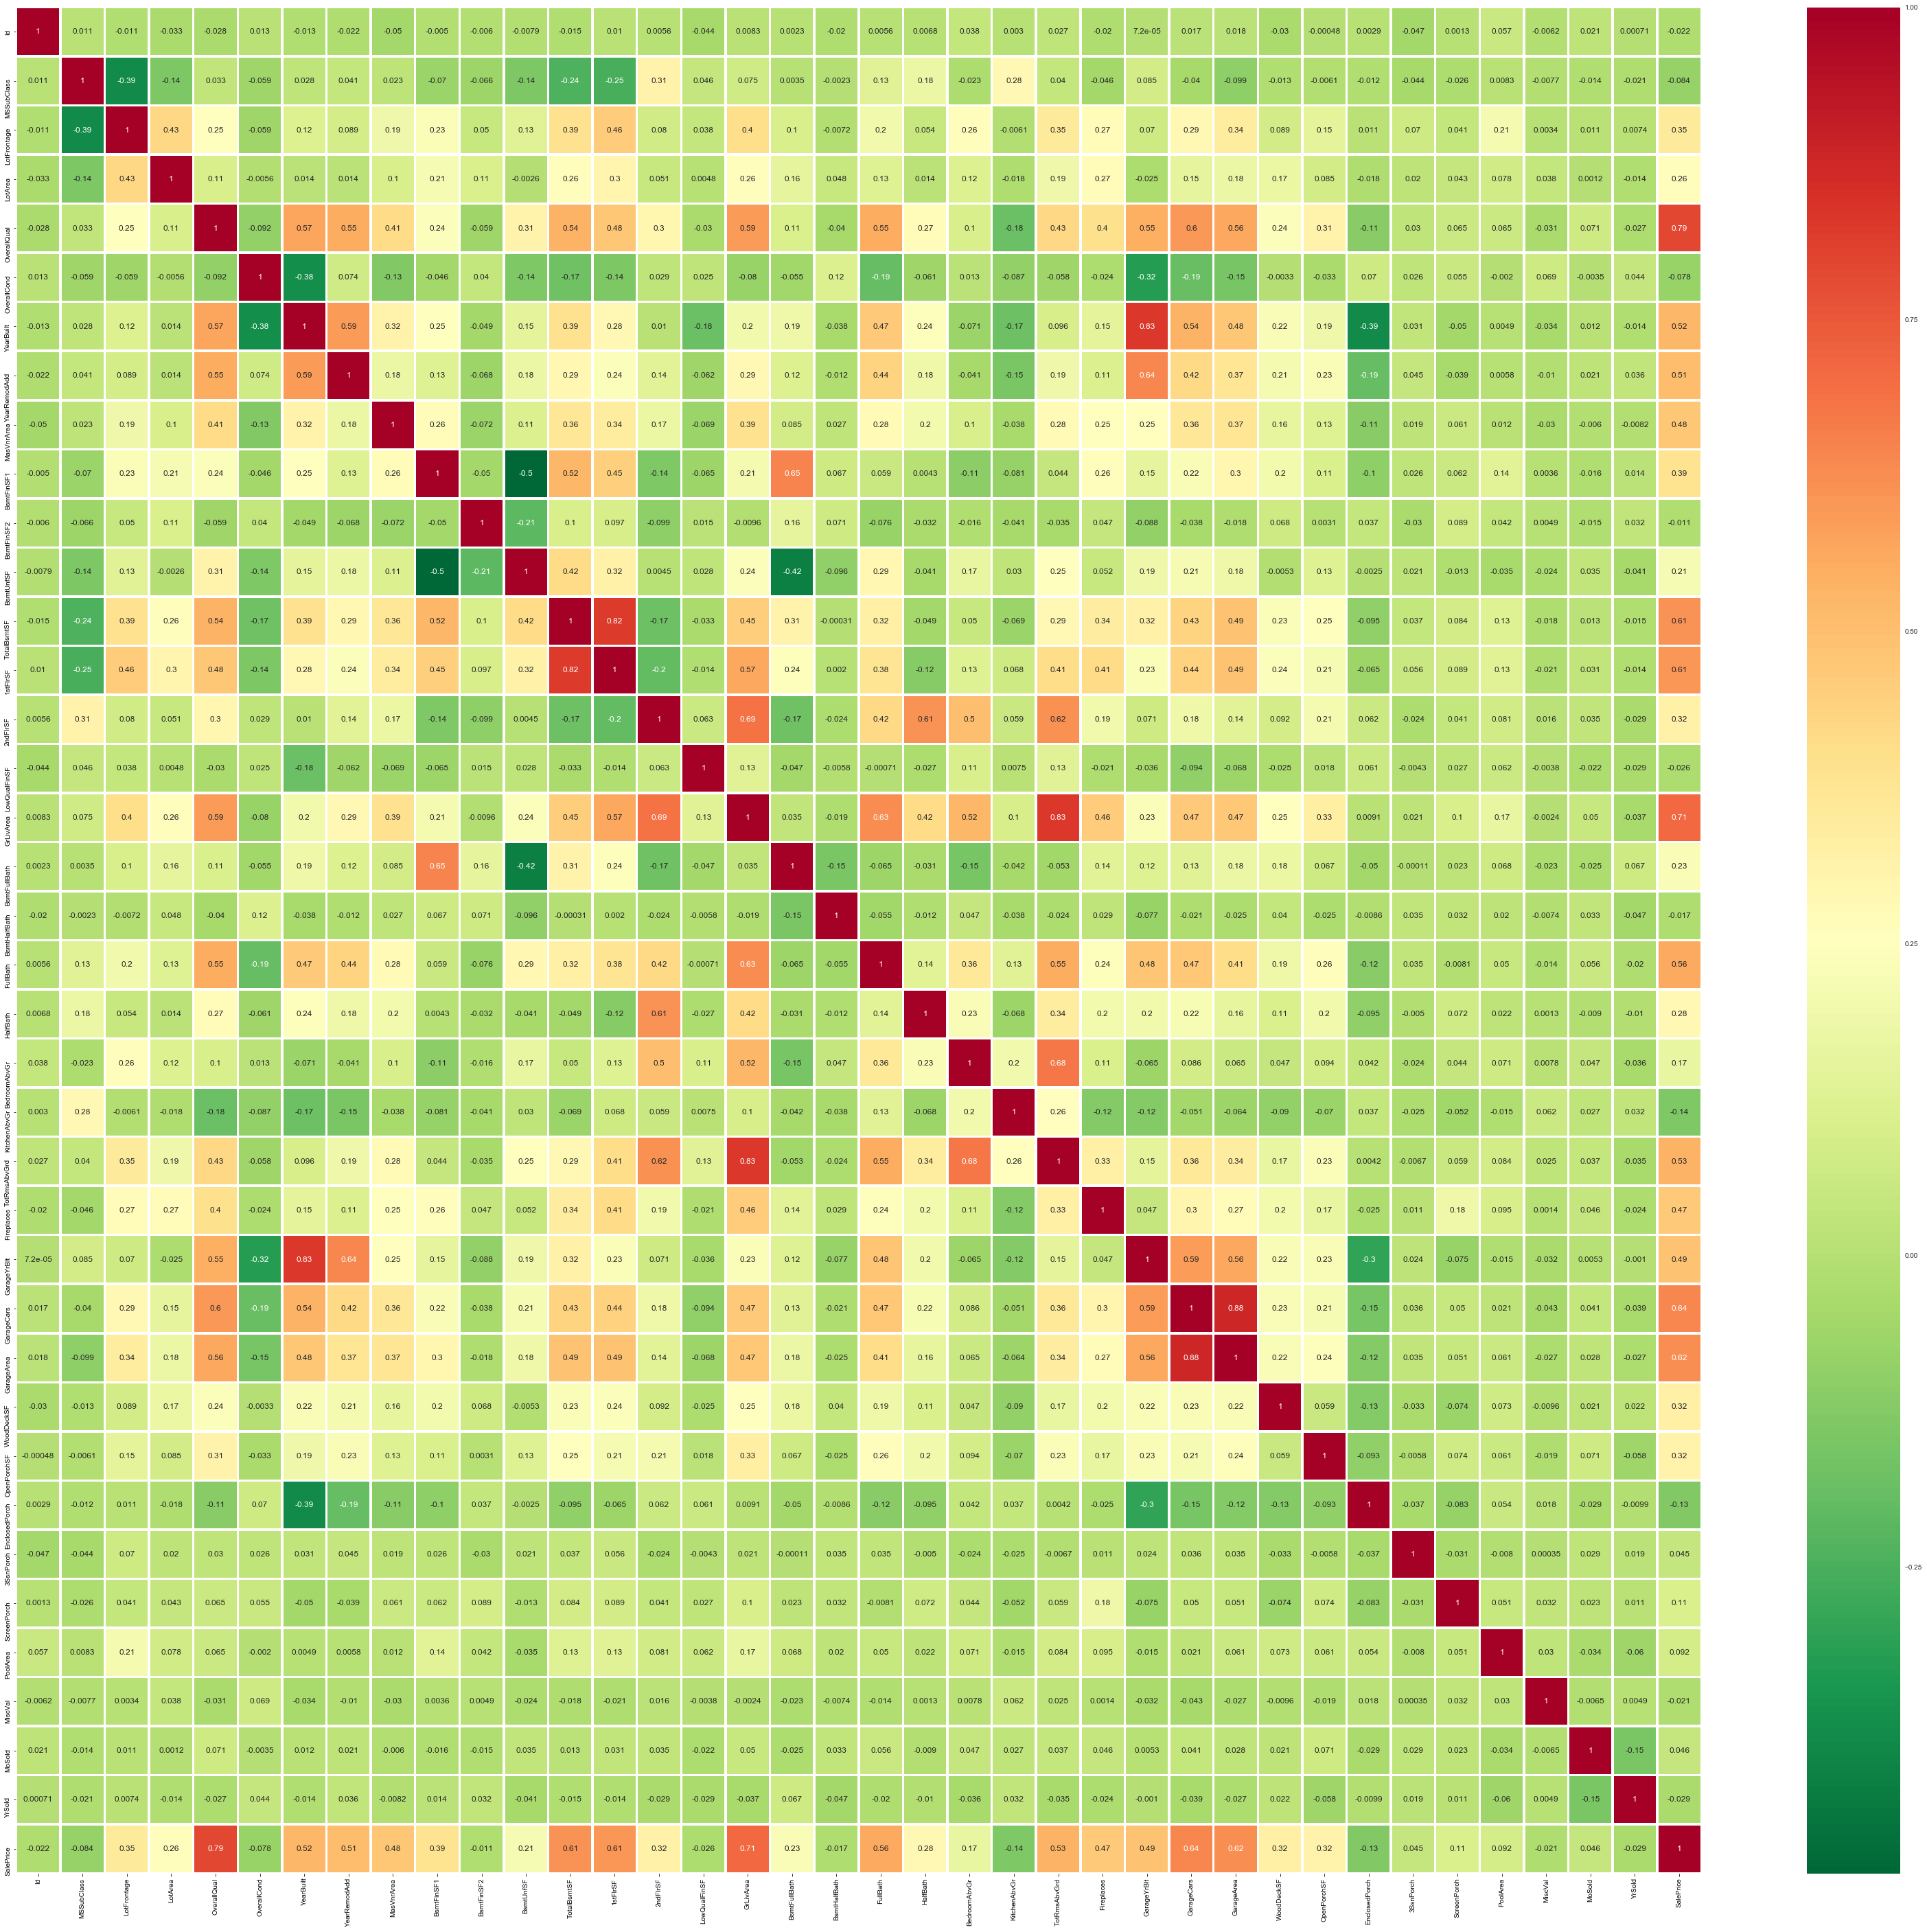

In [8]:
#Correlation map to determine relationship between target and feature variables
corrmat = train.corr()
plt.figure()
plt.subplots(figsize=(55,50))
sns.set(font_scale=1)
sns.heatmap(corrmat,cmap='RdYlGn_r',linewidths=2.5,annot=True)
plt.show()

In [9]:
#Saleprice has good positive correlation with 
#OverallQual
#GrLivingArea
#Fullbath
#TotalRMSAbvGrnd
#GarageCars
#GarageArea
#1stFLSF
#TotalBsmtSF
#Yearbuilt
#YearRemodAdd

#Yearbuilt and GarageYrBuilt have a strong positive correlation. meaning they were built around the same time
#Garagecars and GarageArea have strong positive correlation
#TotalBsmtSF and 1stFLSF have a strong positive correlation

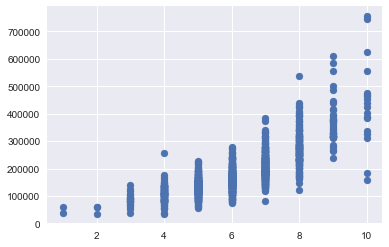

In [10]:
#Plot relation between SalePrice and OverallQual
x = train['OverallQual']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()

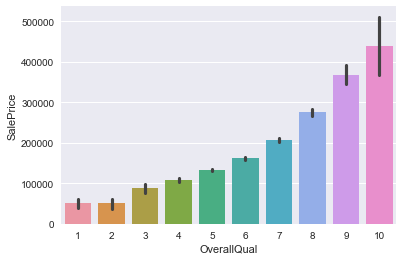

In [11]:
g = sns.barplot(x='OverallQual',y='SalePrice',data=train)
plt.show()
#Clearly there is a linear relation between the two

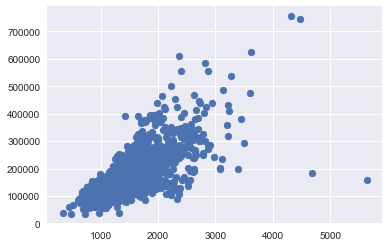

In [12]:
#GrLivingArea
x = train['GrLivArea']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()
#Linear relation except for two outliers where the sale price is very low despite high size of living area

In [13]:
display(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [14]:
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [15]:
#The two outliers are possibly due to the Sale condition being partial Lets remove them
remove_cond = train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)]
train = train.drop(remove_cond.index,axis=0)

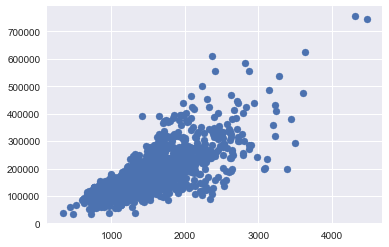

In [16]:
x = train['GrLivArea']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()

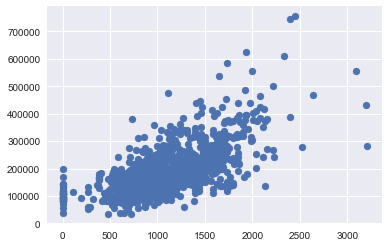

In [17]:
x = train['TotalBsmtSF']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()
#Except for a few cases where there is no basement area, the there is a fair positive correlation between basement and saleprice

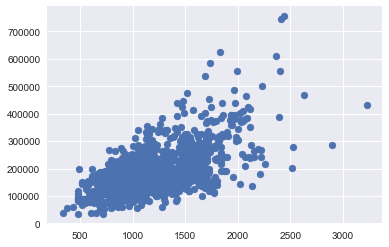

In [18]:
x = train['1stFlrSF']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()
#A nice positive correlation

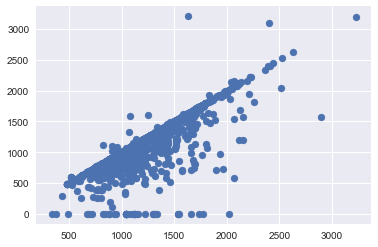

In [19]:
#Are 1stFlrSF and TotalBsmtSF related?
x = train['1stFlrSF']
y = train['TotalBsmtSF']
plt.scatter(x,y)
plt.show()
#Actually yes, so we shall drop TotalBsmtSF

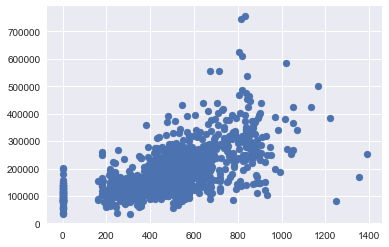

In [20]:
x = train['GarageArea']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()

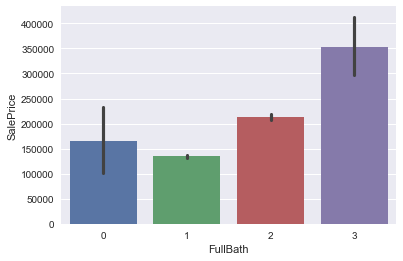

In [21]:
g = sns.barplot(x='FullBath',y='SalePrice',data=train)
plt.show()

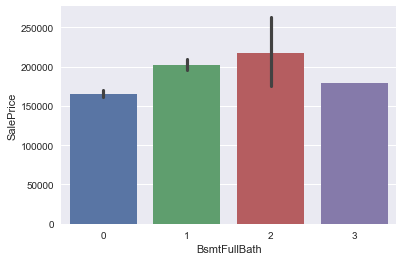

In [22]:
g = sns.barplot(x='BsmtFullBath',y='SalePrice',data=train)
plt.show()

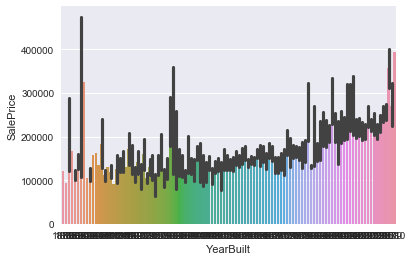

In [23]:
g = sns.barplot(x='YearBuilt',y='SalePrice',data=train)
plt.show()

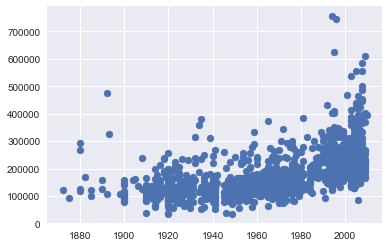

In [24]:
x = train['YearBuilt']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()
#Not much correlation. Unless we are comparing houses of the same size

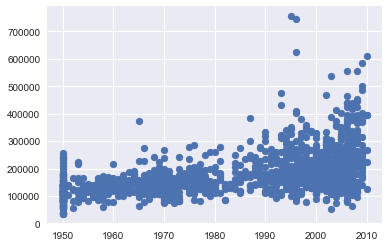

In [25]:
x = train['YearRemodAdd']
y = train['SalePrice']
plt.scatter(x,y)
plt.show()
#Not much correlation here as well

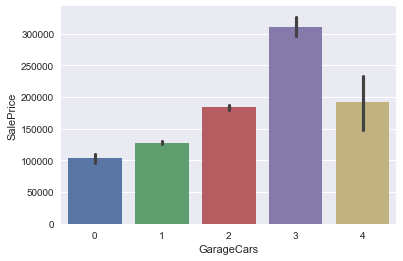

In [26]:
g = sns.barplot(x='GarageCars',y='SalePrice',data=train)
plt.show()
#There is a positive relation as long as the number of cars doesnt exceed 3. Possible outliers. Lets check

In [27]:
#Wtrain[train['GarageArea'] > 1200]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000


In [62]:
#We will nevertheless add additional columns that have a decent impact on SalePrice
#One reason being we will also be running the Ridge/Lasso regularization algorithm which tend to perform well when 
#there are more features to be regularized
cols = ['OverallQual','GrLivArea','GarageArea','FullBath','1stFlrSF','YearBuilt','OverallCond','TotRmsAbvGrd','YearRemodAdd','Fireplaces','BsmtFinSF1',
        'MSZoning','LotArea','SalePrice']
X = train[cols]
#X_test = test[cols]
sns.pairplot(X)
plt.show()

SyntaxError: invalid syntax (<ipython-input-62-426e7d684e78>, line 3)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [30]:
X.head()

,OverallQual,GrLivArea,GarageArea,FullBath,1stFlrSF,YearBuilt,OverallCond,TotRmsAbvGrd,YearRemodAdd,Fireplaces,BsmtFinSF1,SalePrice
0,7,1710,548,2,856,2003,5,8,2003,0,706,208500
1,6,1262,460,2,1262,1976,8,6,1976,1,978,181500
2,7,1786,608,2,920,2001,5,6,2002,1,486,223500
3,7,1717,642,1,961,1915,5,7,1970,1,216,140000
4,8,2198,836,2,1145,2000,5,9,2000,1,655,250000


In [31]:
#X['SalePrice'] = np.log(X['SalePrice'])

In [32]:
X.head()

,OverallQual,GrLivArea,GarageArea,FullBath,1stFlrSF,YearBuilt,OverallCond,TotRmsAbvGrd,YearRemodAdd,Fireplaces,BsmtFinSF1,SalePrice
0,7,1710,548,2,856,2003,5,8,2003,0,706,208500
1,6,1262,460,2,1262,1976,8,6,1976,1,978,181500
2,7,1786,608,2,920,2001,5,6,2002,1,486,223500
3,7,1717,642,1,961,1915,5,7,1970,1,216,140000
4,8,2198,836,2,1145,2000,5,9,2000,1,655,250000


In [33]:
#X_test.info()

In [34]:
test[test['GarageArea'].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1116,2577,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca


In [35]:
test['GarageArea'].fillna(0,inplace=True)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [73]:
#from sklearn.model_selection import train_test_split



#X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.27,random_state=0)
#actual = np.log(y_test)#
#MasVnrArea, BsmtFinSF1

cols = ['OverallQual','GrLivArea','GarageArea','FullBath','1stFlrSF','YearBuilt','OverallCond','TotRmsAbvGrd','YearRemodAdd','Fireplaces','BsmtFinSF1','LotFrontage','LotArea','2ndFlrSF']
X_train = train[cols]
X_test = test[cols]
y_train = np.log(train['SalePrice'])

#y = X['SalePrice']


In [74]:
X_test['BsmtFinSF1'].fillna(0,inplace=True)


C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [75]:
X_train['LotFrontage'].fillna(0,inplace=True)


C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [76]:
X_test['LotFrontage'].fillna(0,inplace=True)

C:\Users\Public\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [39]:
#Here I am going to run four different algorithms. 
#Ridge,Lasso, OLS linear regression and XGBoost. 

from sklearn import linear_model
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.metrics import mean_squared_error


#clf = linear_model.LinearRegression()
#clf.fit(X_train,y_train)

#predictions = clf.predict(X_test)

#solution = pd.DataFrame(test,columns=['Id'],index=None)
#solution['SalePrice'] = predictions 


#solution.to_csv('sample_submission.csv',sep=',',encoding='utf-8',index=False)

# Explained variance score: 1 is perfect prediction
#print('R2 score: %.2f' % r2_score(y_test,predictions))

In [40]:

#y_test = np.log(y_test)
#predictions = np.log(predictions)

#rmse = sqrt(mean_squared_error(y_test,predictions))
#rmse = np.sqrt(mean_squared_error(y_test,predictions))
#print('RMSE: % .2f' % rmse)

In [41]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=360,min_samples_split=500,min_samples_leaf=50,max_depth=2,max_features='sqrt',subsample=0.8,learning_rate=0.1)
clf

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=360,
             presort='auto', random_state=None, subsample=0.8, verbose=0,
             warm_start=False)

In [42]:
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)

#y_test = np.log(y_test)
#predictions = np.log(predictions)

In [43]:
#rmse = np.sqrt(mean_squared_error(y_test,predictions))
#print('RMSE: % .2f' % rmse)

In [44]:
from xgboost import XGBRegressor
clf = XGBRegressor(num_estimators=500,max_depth=3,max_features='sqrt',learning_rate=0.1,min_samples_split=500,min_samples_leaf=100)
clf.fit(X_train,y_train)

predictions = clf.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test,predictions))
#print('RMSE: % .2f' % rmse)

alphas = [-0.5,0,0.2,0.3,0.6,0.5,1,5,10,7,9,13,15,16,17,-10]
alphas

In [56]:
alphas = [0.0001,0.00002,0.001,0.01,0.0005,0.1,0.5] 

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

#model = Ridge(alpha=10)

def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=10))
    return rmse

cv_ridge = [rmse_cv(Ridge(alpha=alpha,normalize=True)).mean() for alpha in alphas]
#cv_ridge = np.log(cv_ridge)
cv_ridge

[0.13376816494332172,
 0.13376958215557783,
 0.1337555828237432,
 0.13372459475264573,
 0.13376190939442692,
 0.13483670142719426,
 0.14493231367717602]

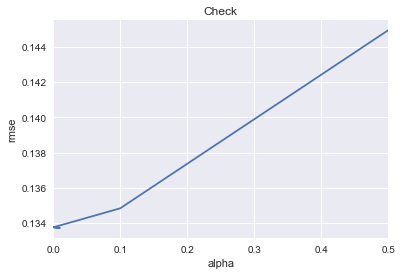

In [69]:
cv_ridge = pd.Series(cv_ridge,index=alphas)
cv_ridge.plot(title='Check')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.show()
#As alpha increases beyond 0.1, the rmse increases too. Probably the model starts underfitting from here

In [48]:
cv_ridge.min()

0.13613575573971065

In [49]:
for alpha in alphas:
    model = Ridge(alpha=alpha,normalize=True)
    model.fit(X_train,y_train)
    print(alpha)
    print(model.coef_)

0.0001
[ 0.08320603  0.00025949  0.00022353 -0.0077017   0.00011215  0.00329242
  0.05101183  0.00345736  0.0012537   0.05225251  0.00011442]
2e-05
[ 0.08320767  0.00025959  0.0002235  -0.00773235  0.00011214  0.00329324
  0.05102306  0.00344191  0.00125309  0.05224182  0.00011442]
0.001
[ 0.08318711  0.00025844  0.00022384 -0.00735874  0.00011223  0.00328325
  0.05088599  0.00362966  0.00126052  0.05237192  0.00011447]
0.01
[ 0.08295307  0.00024863  0.00022682 -0.0041105   0.00011302  0.00319684
  0.0496815   0.00521271  0.00132513  0.05348614  0.00011491]
0.0005
[ 0.08319773  0.00025902  0.00022367 -0.00754884  0.00011219  0.00328833
  0.05095577  0.00353428  0.00125674  0.05230577  0.00011445]
0.1
[ 0.07877563  0.00019303  0.00024359  0.01728919  0.00011794  0.00265122
  0.04103499  0.01350054  0.00173833  0.05984076  0.00011506]
0.5
[ 0.06325304  0.00013366  0.00024618  0.04681835  0.00012078  0.00191558
  0.02441306  0.01958229  0.00211632  0.06248859  0.00010126]


In [78]:
model = Ridge(alpha=0.01)
model.fit(X_train,y_train)
print(model.coef_)
predictions = model.predict(X_test)

[  8.55255239e-02   1.50525545e-04   2.06156926e-04  -9.37821662e-03
   2.02847231e-04   3.34441644e-03   5.06320988e-02   2.45838484e-03
   1.28436061e-03   4.55542330e-02   1.09702503e-04   2.84119322e-04
   2.90572804e-06   1.07061653e-04]


In [88]:
from sklearn.linear_model import Lasso
alphas = [0.1,0.001,0.0001,0.0005,1e-10]
cv_lasso = [rmse_cv(Lasso(alpha=alpha,max_iter=1000000)).mean() for alpha in alphas]
#model = LassoCV(alphas=[0.1,0.005,1,1.005,0.001]).fit(X_train,y_train)
#rmse_cv(model).mean()
cv_lasso

[0.1669539955987136,
 0.13377981931878455,
 0.13377322147586515,
 0.13378587977935982,
 0.13376994649305102]

In [87]:
model = Lasso(alpha=1e-5)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [53]:
import math

In [82]:
solution = pd.DataFrame(test,columns=['Id'],index=None)
solution['SalePrice'] = np.exp(predictions) #Undo the log on the saleprice feature


solution.to_csv('sample_submission.csv',sep=',',encoding='utf-8',index=False)